In [38]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [39]:
X,y = load_diabetes(return_X_y=True)

In [40]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [43]:
print(reg.coef_)
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [44]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [48]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [79]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)

In [80]:
mbr.fit(X_train,y_train)

154.83742294704174 [  38.40848324 -142.67633481  457.28746444  303.60926403  -17.99961807
  -85.81943788 -192.04933133  116.18528414  407.24722272  105.8082595 ]


In [81]:
y_pred = mbr.predict(X_test)

In [82]:
r2_score(y_test,y_pred)

0.4518861449568681

In [125]:
from sklearn.linear_model import SGDRegressor

In [132]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

#### We donot have direct way of implementing mini batch gradient descent. We can use below technique to use it 

In [133]:
batch_size = 35

for i in range(100):
    
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx]) # partial fit will iterate for 1 epoch only 

In [134]:
sgd.coef_

array([  49.19545821,  -67.84533938,  338.57819421,  247.97315609,
         25.30849249,  -24.71685159, -155.45845777,  116.19331239,
        312.91250811,  133.36595993])

In [135]:
sgd.intercept_

array([148.61489911])

In [136]:
y_pred = sgd.predict(X_test)

In [137]:
r2_score(y_test,y_pred)

0.4271789125617129

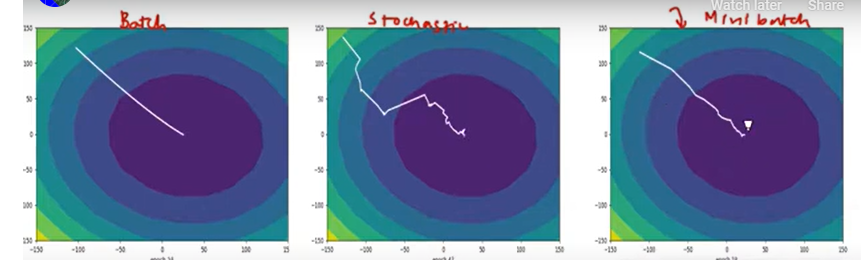